In [27]:
%matplotlib inline
import pandas as pd

In [28]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [29]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,8,2007
1,Romans,2016
2,Ultra-Toxic,2005
3,The Candy Man,1969
4,Friends & Lovers: The Ski Trip 2,2008


In [30]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
2,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
3,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
4,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN


### Using groupby(), plot the number of films that have been released each decade in the history of cinema.

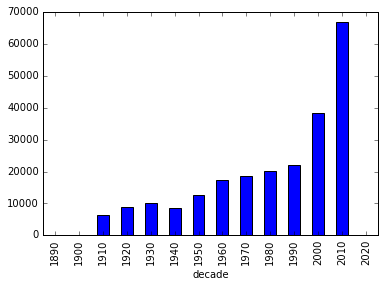

In [31]:
titles['decade'] = titles.year // 10 * 10
numberf = titles.groupby(['decade']).size()
numberf.plot(kind='bar')

### Use groupby() to plot the number of "Hamlet" films made each decade.

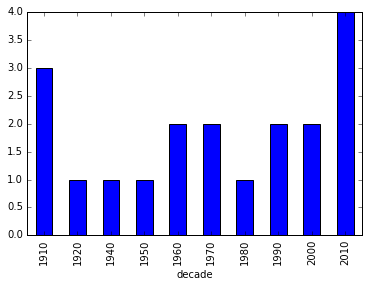

In [32]:
hamletf = titles[titles.title == 'Hamlet'].groupby(['decade']).size()
hamletf.plot(kind='bar')

### How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

In [33]:
leading = cast[(cast.year >= 1950) & (cast.year <= 1959) & (cast.n == 1)]
leading.groupby('type').size()

type
actor      6563
actress    2940
dtype: int64

### In the 1950s decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 5?

In [67]:
thedecade = cast[(cast.year >=1950) & (cast.year <=1959)]
thedecade.groupby(['n', 'type']).size()

n      type   
1.0    actor      6563
       actress    2940
2.0    actor      4530
       actress    4519
3.0    actor      5538
       actress    3129
4.0    actor      5548
       actress    2828
5.0    actor      5568
       actress    2525
6.0    actor      5505
       actress    2301
7.0    actor      5429
       actress    2023
8.0    actor      5212
       actress    1796
9.0    actor      4829
       actress    1635
10.0   actor      4394
       actress    1475
11.0   actor      3861
       actress    1346
12.0   actor      3433
       actress    1151
13.0   actor      2896
       actress     965
14.0   actor      2498
       actress     849
15.0   actor      2163
       actress     708
                  ... 
137.0  actor         1
138.0  actor         1
139.0  actor         1
140.0  actor         1
141.0  actor         2
142.0  actor         2
143.0  actor         2
144.0  actor         2
145.0  actor         2
146.0  actor         2
147.0  actor         2
148.0  actor       

### Use groupby() to determine how many roles are listed for each of the Pink Panther movies.

In [38]:
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
2,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
3,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
4,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN


In [46]:
pinkp=cast[cast.title=='The Pink Panther']
pinkp.head()

,title,year,name,type,character,n
929,The Pink Panther,2006,William Abadie,actor,Bizu,11.0
14188,The Pink Panther,2006,Scott (II) Adkins,actor,Jacquard,20.0
54587,The Pink Panther,2006,Patrick (III) Anderson,actor,NYC Firefighter,NaN
81873,The Pink Panther,2006,Michael Arthur,actor,Officer #1,NaN
138094,The Pink Panther,1963,John Bartha,actor,Policeman,NaN


In [47]:
pinkp.groupby('year').size()

year
1963    19
2006    89
dtype: int64

### List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [61]:
franko=cast[cast.name=='Frank Oz']
franko=franko.groupby('year').size()
franko.sort_values(ascending = False)[0:12]

year
1992    8
1999    8
1981    8
1979    8
1984    7
1996    4
1985    4
1983    3
2015    2
1982    2
2005    2
1980    2
dtype: int64

### List each of the characters that Frank Oz has portrayed at least twice.

In [66]:
franko1=cast[cast.name=='Frank Oz']
franko1=franko1.groupby('character').size()
franko.sort_values(ascending = False)[0:12]

year
1992    8
1999    8
1981    8
1979    8
1984    7
1996    4
1985    4
1983    3
2015    2
1982    2
2005    2
1980    2
dtype: int64